In [1]:
import numpy as np
import matplotlib.pyplot as plt

from implementations import *

In [2]:
DATA_FOLDER = 'data/'

In [3]:
x_tr = np.genfromtxt(DATA_FOLDER + 'x_train.csv', delimiter=",", names=True)

In [4]:
x_tr

array([(0.00000e+00, 53., 11., 11162015., 11., 16., 2015., 1100., 2.01501563e+09, 2.01501563e+09, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,  1.,  2.,  1., nan,  1.,  1.,  2., 2.,  1.,  5., 88., 1., 1., 2., 1., 3., nan, 1., 1., 2., 2., 2., nan, 2., 2., 2., 2., 1., 2., 3., nan, 2., 1., 5., 1., nan, nan, nan, 2., 1., 88.,  8., 1.,  110., 501., nan, 1., 2., 2., 2., 2., 2., 2., 1.,  1.,  1., nan, 3., 888., nan, nan, nan, 555., 205., 304., 303., 308., 205.,  1., 64., 102.,  30., 98., 220.,  30., 105., nan, nan, nan, nan,  1.,  1., 102015.,  8.,  2.,  2., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,  3.,  1.,  5.,  2., nan,  1., nan, nan,  1.,  4.,  1.,  2.,  4., nan, nan, nan, nan, nan, nan, nan, nan, na

In [5]:
def get_nan_percentage(data: np.ndarray):
    return np.sum(np.isnan([row.tolist() for row in data]), axis=0) * 100 / len(x_tr)

In [6]:
def filter_columns_by_nan_threshold(nan_percentage: np.ndarray, threshold: float):
    filtered_columns = [column for column, percentage in zip(column_names, nan_percentage) if percentage > threshold]
    other_columns = [column for column in column_names if column not in filtered_columns] 
    filtered_nan_percentage = [percentage for percentage in nan_percentage if percentage > threshold]
    
    return filtered_columns, other_columns, filtered_nan_percentage

In [7]:
nan_percentage = get_nan_percentage(x_tr)

# Get column names from the structured array
column_names = x_tr.dtype.names

# Filter columns with missing values greater than certain threshold
threshold = 95
filtered_columns, other_columns, filtered_nan_percentage = filter_columns_by_nan_threshold(nan_percentage, threshold)

In [8]:
sorted_indices = np.argsort(filtered_nan_percentage)[::-1]
sorted_filtered_columns = [filtered_columns[i] for i in sorted_indices]
sorted_filtered_nan_percentage = [filtered_nan_percentage[i] for i in sorted_indices]

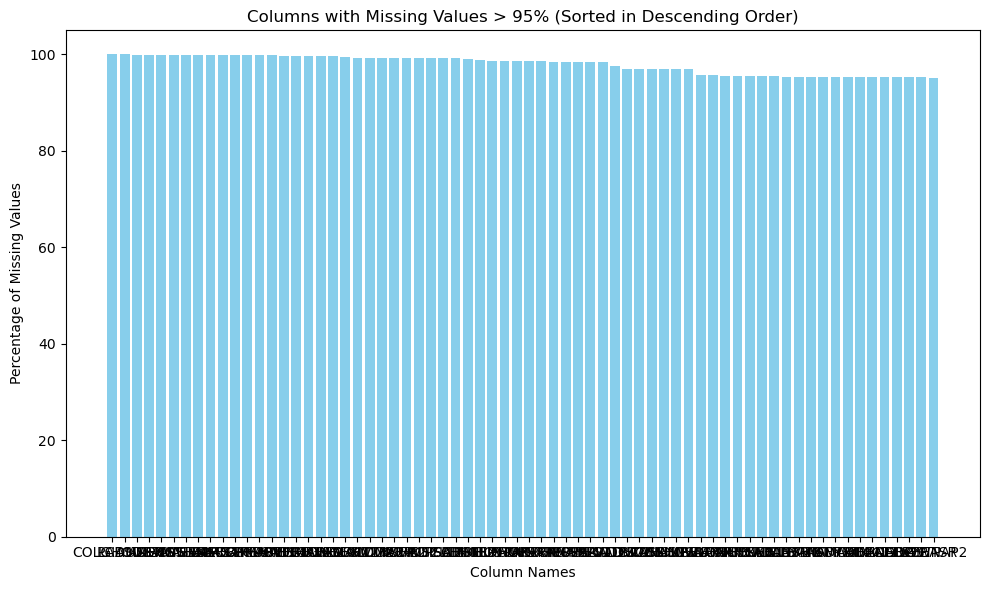

There are 68 columns with missing values greater than 95%


In [9]:
plt.figure(figsize=(10, 6))
plt.bar(sorted_filtered_columns, sorted_filtered_nan_percentage, color='skyblue')
plt.xlabel('Column Names')
plt.ylabel('Percentage of Missing Values')
plt.title(f'Columns with Missing Values > {threshold}% (Sorted in Descending Order)')
plt.tight_layout()
plt.show()

print(f'There are {len(sorted_filtered_columns)} columns with missing values greater than {threshold}%')

In [10]:
clean_x_tr = x_tr[other_columns]
clean_x_tr

array([(0.00000e+00, 53., 11., 11162015., 11., 16., 2015., 1100., 2.01501563e+09, 2.01501563e+09, nan, nan, nan, nan, nan, nan, nan,  1.,  1.,  2.,  1.,  1.,  1.,  2., 2.,  1.,  5., 88., 1., 1., 2., 1., 3., nan, 1., 1., 2., 2., 2., nan, 2., 2., 2., 2., 1., 2., 3., nan, 2., 1., 5., 1., nan, nan, 2., 1., 88.,  8., 1.,  110., 501., nan, 1., 2., 2., 2., 2., 2., 2., 1.,  1.,  1., nan, 3., 888., nan, nan, nan, 555., 205., 304., 303., 308., 205.,  1., 64., 102.,  30., 98., 220.,  30., 105., nan, nan, nan, nan,  1.,  1., 102015.,  8.,  2.,  2., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  4., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 20., 1., nan, 532049., 120.93168022, 1., 120.93168022, nan, nan, nan,           nan, 2., 0.23394789, 264.74118124, 1., 1., 1., 1., 1., 1., 1., 3., 2., 1., 1., 2., 1., 1., 1., 1.,  8., 1., 57., 5., 61., 1.55,  49.9 , 20.78,

In [11]:
# Assuming 'clean_x_tr' is your structured NumPy array
# Get column names
column_names = clean_x_tr.dtype.names

# Iterate through columns and replace NaN values with the respective column mean
for col_name in column_names:
    col_data = clean_x_tr[col_name]
    if np.issubdtype(col_data.dtype, np.number):
        col_mean = np.nanmean(col_data)  # Calculate column mean, ignoring NaN values
        nan_indices = np.isnan(col_data)
        col_data[nan_indices] = col_mean  # Replace NaN values with column mean

# Now 'clean_x_tr' contains NaN values filled with the mean values of their respective columns

In [12]:
clean_x_tr

array([(0.00000e+00, 53., 11., 11162015., 11., 16., 2015., 1100., 2.01501563e+09, 2.01501563e+09, 1., 1.00016956, 1., 1.54463226, 1.79388666, 0.80157043, 0.99193574, 1., 1., 2.        , 1.        , 1.        , 1.        , 2.        , 2.,  1.,  5., 88.        , 1., 1., 2., 1., 3., 1.17256318, 1., 1., 2., 2., 2., 1.48319767, 2., 2., 2., 2., 1., 2., 3., 54.47468025, 2., 1., 5., 1., 1.97233997, 1.22575244, 2., 1., 88.,  8., 1.,  110., 501., 2.0091393, 1., 2., 2., 2., 2., 2., 2., 1., 1.        , 1.       , 6.75296917, 3., 888.,  3.4693727, 67.79923274, 5.56346536, 555.        , 205.        , 304.        , 303.        , 308.       , 205.        , 1.        , 64.        , 102.       ,  30.       , 98.        , 220.        ,  30.        , 105.        , 1.57779468, 1.8626004, 2.44153837, 6.18715357, 1.        , 1.        , 102015.        , 8.        , 2.        , 2.        , 388963.86517464, 4.59039421, 1.61755037, 2.79715523, 1.67853524, 253.75392694, 268.7538582, 14.52317332, 14.49267484, 24.